In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
import librosa as lb
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Handeling Class Imbalance

In [2]:
diagnosis=pd.read_csv('/kaggle/input/respiratory-sound-database/respiratory_sound_database/Respiratory_Sound_Database/patient_diagnosis.csv',names=['pid','disease'])
diagnosis.head()

,pid,disease
0,101,URTI
1,102,Healthy
2,103,Asthma
3,104,COPD
4,105,URTI


* In the following plot we can see that classes are **imbalanced** so we must split them into train and validation set via stratify

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

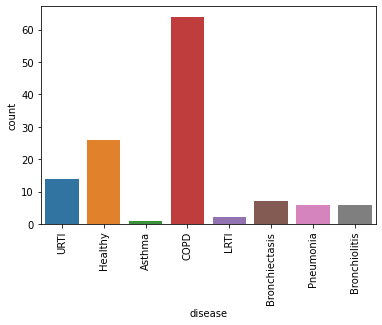

In [3]:
sns.countplot(diagnosis.disease)
plt.xticks(rotation=90)

> We will try to extract **Id** of each processed audio file and then merge them with their respective **class label** so we can split files in to train and validation folder in **stratified manner**

In [4]:
import os
def extractId(filename):
    return filename.split('_')[0]

In [5]:
path='/kaggle/input/preprocessing-part-1/processed_audio_files/'
length=len(os.listdir(path))
index=range(length)
i=0
files_df=pd.DataFrame(index=index,columns=['pid','filename'])
for f in os.listdir(path):
    files_df.iloc[i]['pid']=extractId(f)
    files_df.iloc[i]['filename']=f
    i+=1
files_df.head()

,pid,filename
0,136,136_1b1_Ar_sc_Meditron_2.wav
1,187,187_1b1_Ll_sc_Meditron_5.wav
2,222,222_1b1_Lr_sc_Meditron_17.wav
3,141,141_1b3_Pr_mc_LittC2SE_2.wav
4,175,175_1b1_Pr_sc_Litt3200_3.wav


In [6]:
files_df.pid=files_df.pid.astype('int64') # both pid's must be of same dtype for them to merge

In [7]:
data=pd.merge(files_df,diagnosis,on='pid')
data.head()

,pid,filename,disease
0,136,136_1b1_Ar_sc_Meditron_2.wav,Healthy
1,136,136_1b1_Ar_sc_Meditron_7.wav,Healthy
2,136,136_1b1_Ar_sc_Meditron_6.wav,Healthy
3,136,136_1b1_Ar_sc_Meditron_4.wav,Healthy
4,136,136_1b1_Ar_sc_Meditron_3.wav,Healthy


(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

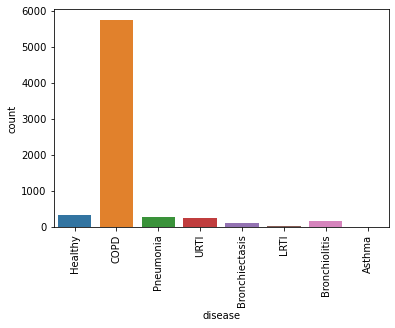

In [8]:
sns.countplot(data.disease)
plt.xticks(rotation=90)

> We can see that classes are very **skewed**

In [9]:
from sklearn.model_selection import train_test_split
Xtrain,Xval,ytrain,yval=train_test_split(data,data.disease,stratify=data.disease,random_state=42,test_size=0.25)

* Above i used the **stratify** arg of **train_test_split** and set it to disease to stratify data based on **class labels**

In [10]:
Xtrain.disease.value_counts()/Xtrain.shape[0]

COPD              0.832979
Healthy           0.046588
Pneumonia         0.041369
URTI              0.035183
Bronchiolitis     0.023197
Bronchiectasis    0.015078
LRTI              0.004639
Asthma            0.000967
Name: disease, dtype: float64

In [11]:
Xval.disease.value_counts()/Xval.shape[0]

COPD              0.833043
Healthy           0.046957
Pneumonia         0.041159
URTI              0.035362
Bronchiolitis     0.023188
Bronchiectasis    0.015072
LRTI              0.004638
Asthma            0.000580
Name: disease, dtype: float64

> % of class labels in same in both train and val as we can see above

* We did this because this will help our model to **learn and validate classes** , it will not be like we are training only on COPD disease and there is no COPD in our validation

# Visualizing MFCCS 

> I have used one file as an example here.

[Text(0.5, 1.0, 'MFCC')]

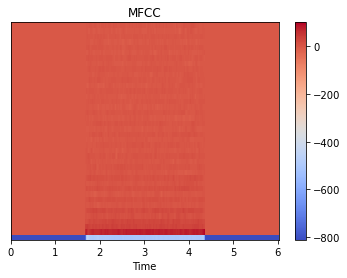

In [12]:
path='../input/preprocessing-part-1/processed_audio_files/'

import librosa.display
file=path + Xtrain.iloc[193].filename 
sound,sample_rate=lb.load(file)
mfccs = lb.feature.mfcc(y=sound, sr=sample_rate, n_mfcc=40)
fig, ax = plt.subplots()
img = librosa.display.specshow(mfccs, x_axis='time', ax=ax)
fig.colorbar(img, ax=ax)
ax.set(title='MFCC')

* Here I am going to output **train & test datasets** so that i can use the **filenames** in then in another notebook where i will try other **feature extraction** methods inclusive of MFCC's and adopt the one or many based on **performance**.

In [13]:
Xtrain.to_csv('train.csv')
Xval.to_csv('val.csv')